# Problem Statement

### Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] =(200)
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_excel(r"C:\Users\yashv\Downloads\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


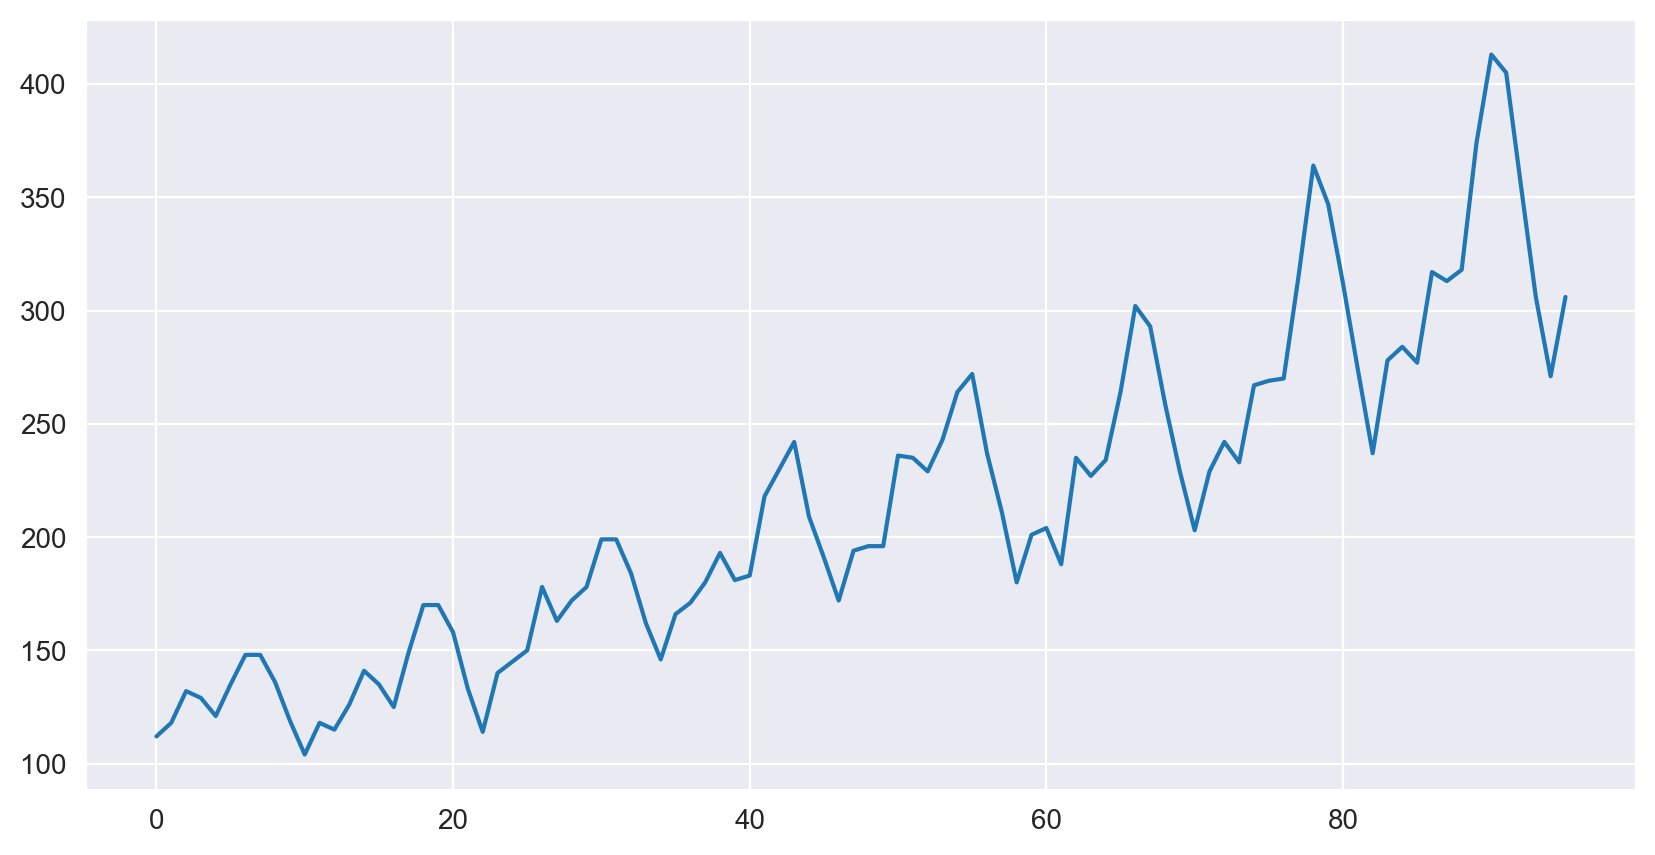

In [4]:
plt.plot(df['Passengers'])

In [5]:
df['first-order'] = df['Passengers'].diff(periods=1)

In [6]:
df

,Month,Passengers,first-order
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0
...,...,...,...
91,2002-08-01,405,-8.0
92,2002-09-01,355,-50.0
93,2002-10-01,306,-49.0
94,2002-11-01,271,-35.0


In [7]:
df.dropna(inplace=True)

In [8]:
df

,Month,Passengers,first-order
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0
5,1995-06-01,135,14.0
...,...,...,...
91,2002-08-01,405,-8.0
92,2002-09-01,355,-50.0
93,2002-10-01,306,-49.0
94,2002-11-01,271,-35.0


In [9]:
# Date Extraction
df["Date"] = pd.to_datetime(df.Month,format="%Y-%m")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y")  # year extraction

In [10]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [11]:
months_dummies = pd.DataFrame(pd.get_dummies(df['month']))
months_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
df

,Month,Passengers,first-order,Date,month,year
1,1995-02-01,118,6.0,1995-02-01,Feb,1995
2,1995-03-01,132,14.0,1995-03-01,Mar,1995
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995
4,1995-05-01,121,-8.0,1995-05-01,May,1995
5,1995-06-01,135,14.0,1995-06-01,Jun,1995
...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002


In [13]:
df = pd.concat([df,months_dummies], axis = 1)

In [14]:
df

,Month,Passengers,first-order,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,1995-02-01,118,6.0,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,14.0,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,-3.0,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,-8.0,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,14.0,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,-8.0,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,-50.0,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,-49.0,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,-35.0,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df.drop(columns='first-order',inplace=True)


In [16]:
df.head(5)

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
df['t'] = np.arange(1,96)

In [20]:
df['t_squared'] = df['t']*df['t']
df['log_passengers'] = np.log(df['Passengers'])

In [21]:
df

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791
5,1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,5,25,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,91,8281,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,92,8464,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,93,8649,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

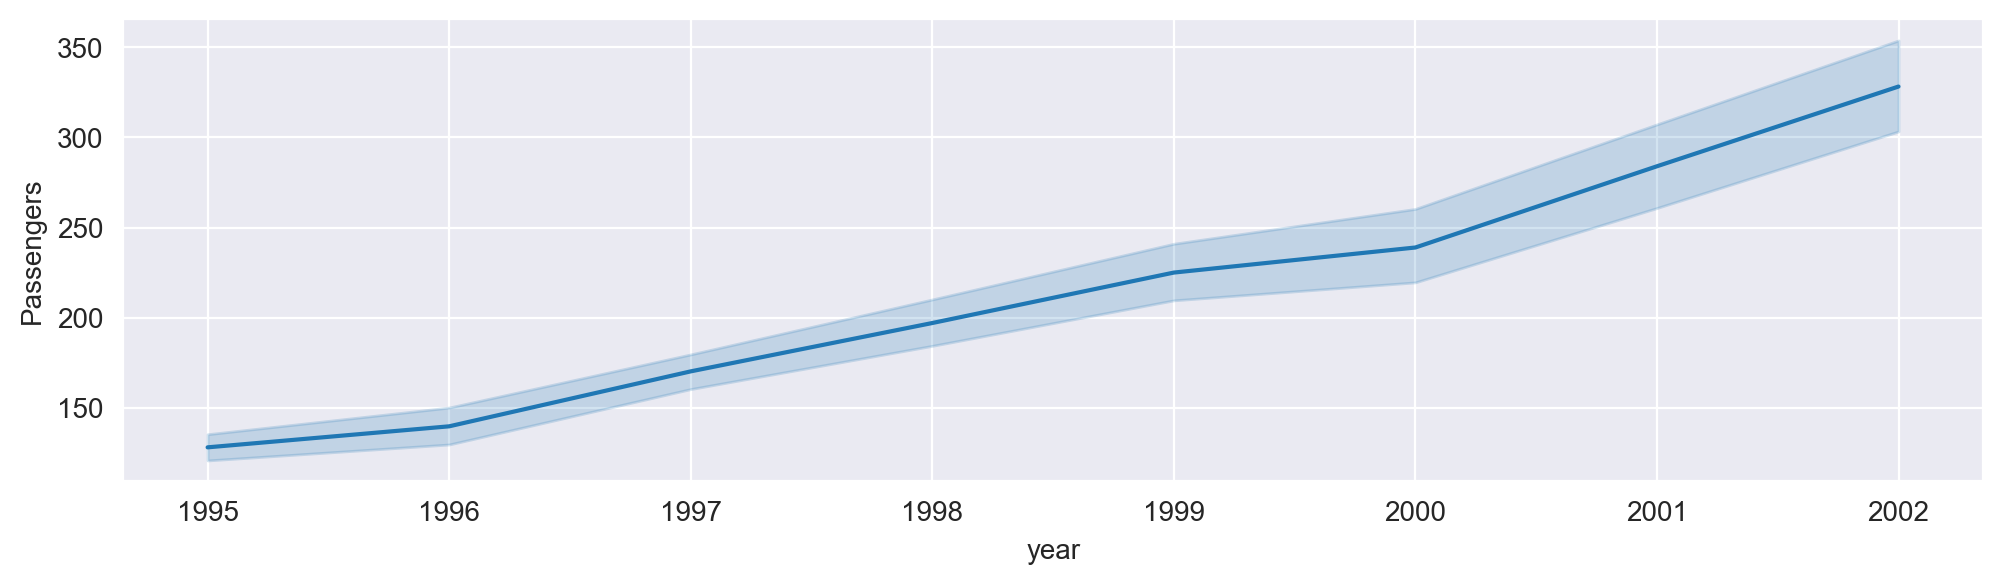

In [26]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

Text(0, 0.5, 'Autocorrelation (r2 value)')

<Figure size 3000x1600 with 0 Axes>

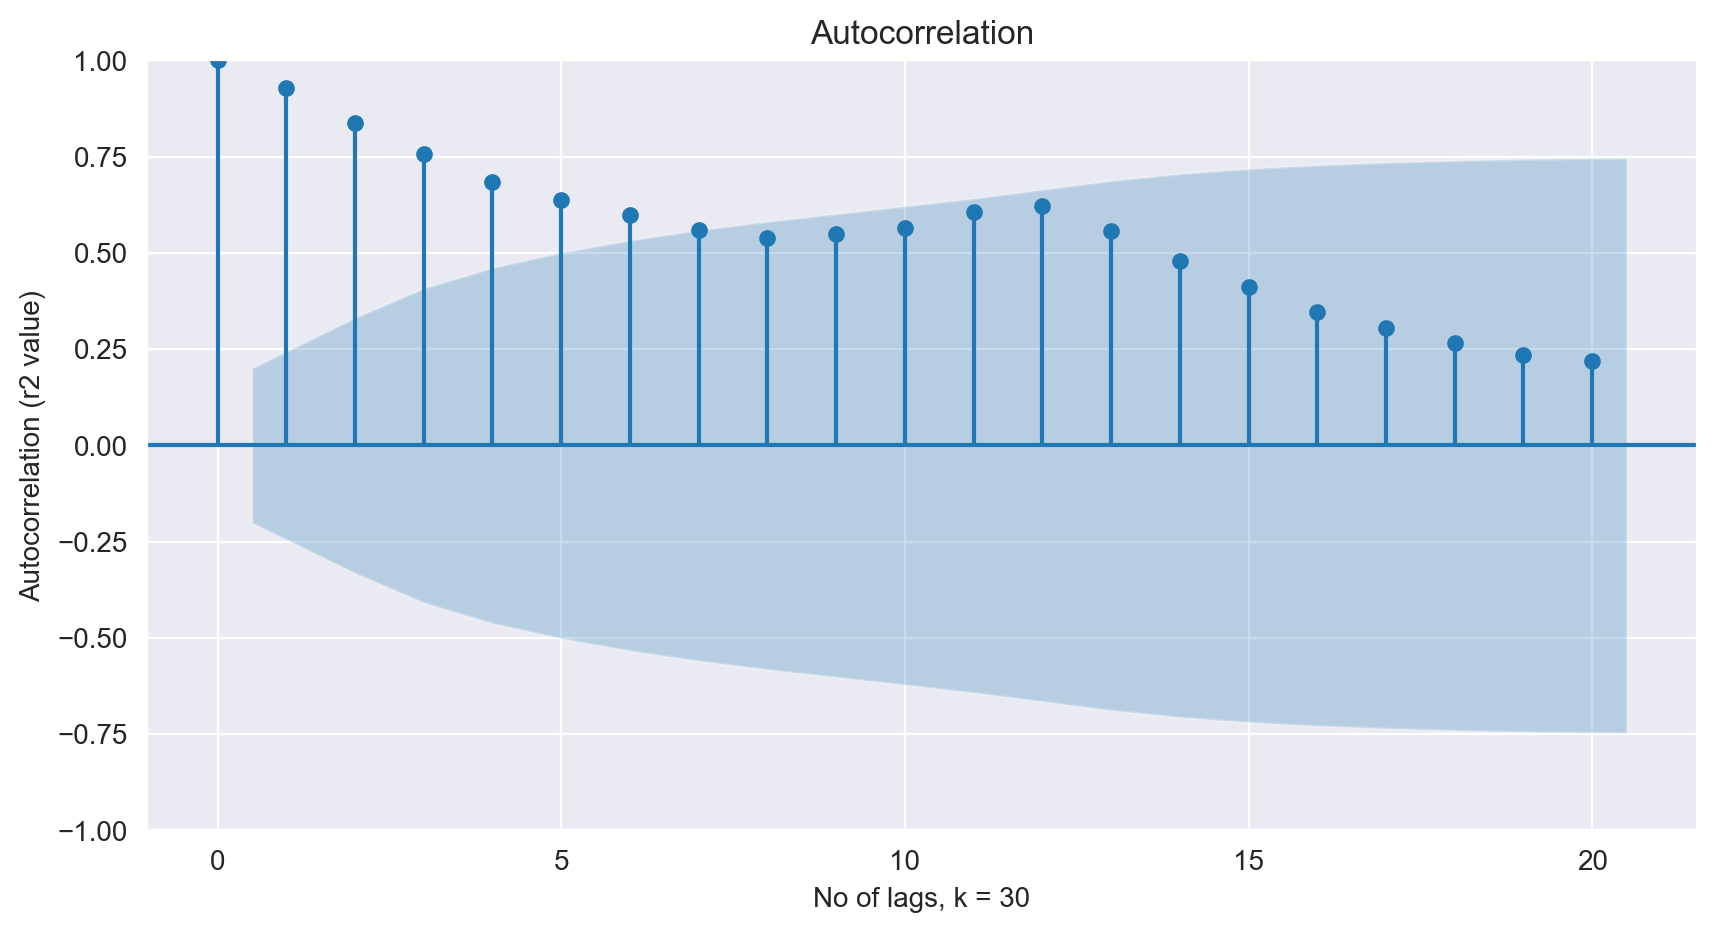

In [27]:

plt.figure(figsize = (15,8))
plot_acf(df['Passengers'])                                    
plt.xlabel("No of lags, k = 30")
plt.ylabel("Autocorrelation (r2 value)")

In [22]:
train=df.head(76)
test=df.head(19)

In [23]:
train

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791
5,1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,5,25,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2001-01-01,242,2001-01-01,Jan,2001,0,0,0,0,1,0,0,0,0,0,0,0,72,5184,5.488938
73,2001-02-01,233,2001-02-01,Feb,2001,0,0,0,1,0,0,0,0,0,0,0,0,73,5329,5.451038
74,2001-03-01,267,2001-03-01,Mar,2001,0,0,0,0,0,0,0,1,0,0,0,0,74,5476,5.587249
75,2001-04-01,269,2001-04-01,Apr,2001,1,0,0,0,0,0,0,0,0,0,0,0,75,5625,5.594711


In [24]:
test

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16,4.795791
5,1995-06-01,135,1995-06-01,Jun,1995,0,0,0,0,0,0,1,0,0,0,0,0,5,25,4.905275
6,1995-07-01,148,1995-07-01,Jul,1995,0,0,0,0,0,1,0,0,0,0,0,0,6,36,4.997212
7,1995-08-01,148,1995-08-01,Aug,1995,0,1,0,0,0,0,0,0,0,0,0,0,7,49,4.997212
8,1995-09-01,136,1995-09-01,Sep,1995,0,0,0,0,0,0,0,0,0,0,0,1,8,64,4.912655
9,1995-10-01,119,1995-10-01,Oct,1995,0,0,0,0,0,0,0,0,0,0,1,0,9,81,4.779123
10,1995-11-01,104,1995-11-01,Nov,1995,0,0,0,0,0,0,0,0,0,1,0,0,10,100,4.644391


# Linear Model

In [37]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [39]:
linear_model  = smf.ols('Passengers~t',data=train,).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_lm = np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_lm

15.710464077515187

# Exponential Model

In [43]:
exp_model = smf.ols('log_passengers~t',data=train,).fit()
pred_exp = pd.Series(exp_model.predict(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

129.86954107916992

# Quadratic Model

In [47]:
quad_model = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = quad_model.predict(test[["t", "t_squared"]])

rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

15.779606210649813

# Additive Seasonality

In [48]:
as_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_as = as_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_as = np.sqrt(mean_squared_error(test['Passengers'],pred_as))
rmse_as

59.111919270825965

# Additive Seasonality Quadratic

In [58]:
asq_model = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_asq = pd.Series(asq_model.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_asq = np.sqrt(mean_squared_error(test['Passengers'],pred_asq))
rmse_asq

10.266589079232716

# Multiplicative Seasonality

In [53]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_ms = np.sqrt(mean_squared_error(test['Passengers'],pred_Mult_sea))
rmse_ms

129.53962175542492

# Multiplicative Additive Seasonality

In [54]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_mas = np.sqrt(mean_squared_error(test['Passengers'],pred_Mult_add_sea))
rmse_mas

129.8425679234074

# Multiplicative Seasonality Quadratic

In [56]:
mult_sea_Quad = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_msq = np.sqrt(mean_squared_error(test['Passengers'],pred_Mult_add_sea))
rmse_msq

129.8425679234074

In [64]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_lm,rmse_exp,rmse_quad,rmse_as,rmse_asq,rmse_ms,rmse_mas])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,10.266589
0,rmse_linear,15.710464
2,rmse_Quad,15.779606
3,rmse_add_sea,59.111919
5,rmse_Mult_sea,129.539622
6,rmse_Mult_add_sea,129.842568
1,rmse_Exp,129.869541


# Final Model 

In [65]:
final_model= smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df).fit()

In [66]:
pred_new  = pd.Series(final_model.predict(df))
pred_new

1     4.702758
2     4.845937
3     4.813084
4     4.806561
5     4.930403
        ...   
91    5.979069
92    5.868830
93    5.738718
94    5.608268
95    5.744815
Length: 95, dtype: float64

In [67]:
df["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

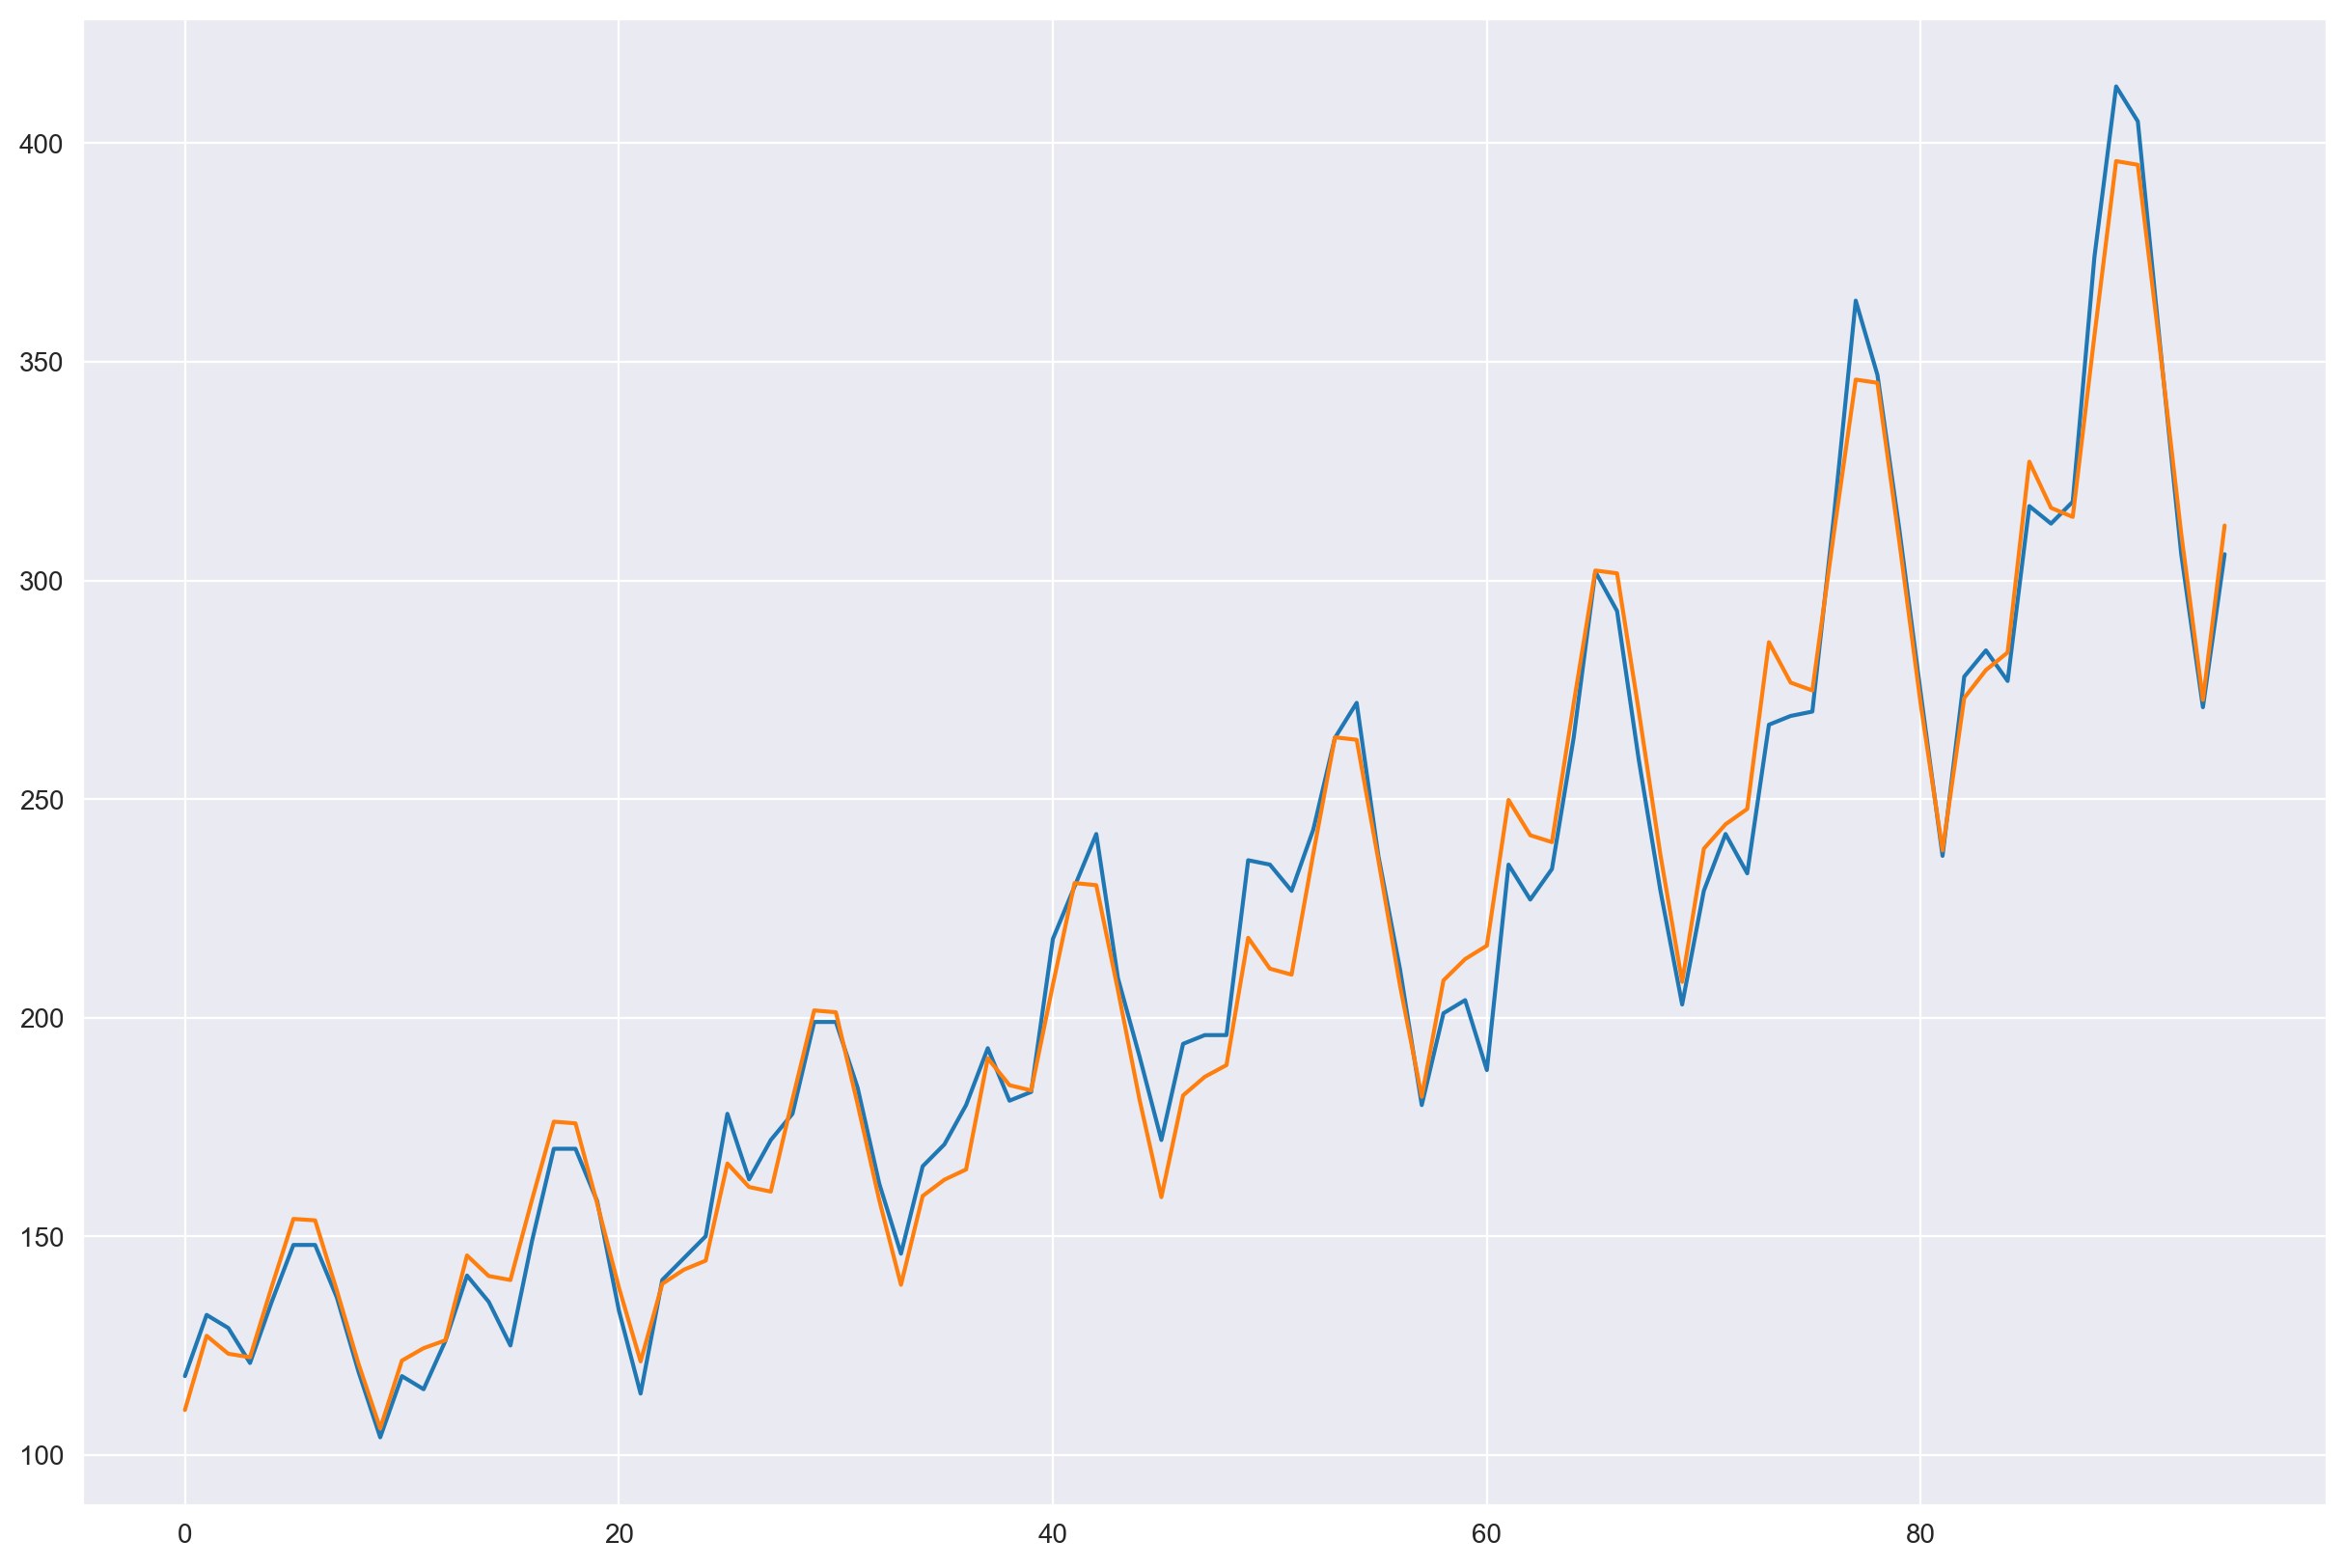

In [68]:
plt.figure(figsize=(15,10))
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))